In [1]:
# optional: run once if packages aren't installed in your environment
!pip install pandas matplotlib seaborn wordcloud nltk

# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
sns.set(style="whitegrid")
%matplotlib inline


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.3 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.3 MB/s  0:00:01

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   -------------------- ------------------- 2/4 [joblib]
   -------------------- ------------------- 2/4 [joblib]
   -------------------- ------------------- 2/4 [joblib]
   -------------------- ------------------- 2/4 [joblib]

In [6]:
import os
print(os.getcwd())


C:\Users\Emily


In [14]:
import pandas as pd

nrows = 10000
df_sample = pd.read_csv("C:/Users/Emily/metadata.csv", nrows=nrows, low_memory=False)
df_sample.head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [17]:
df = pd.read_csv("metadata.csv", nrows=10000, low_memory=False)


In [18]:
# peek at first rows, columns and types
df.head(5)

df.info()          # structure and dtypes
df.columns.tolist()   # column names - check these; adapt following code if names differ

# Check missing-values in important columns
important = ['title','abstract','publish_time','journal','source_x']   # edit if your file has different names
df[important].isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          10000 non-null  object 
 1   sha               9010 non-null   object 
 2   source_x          10000 non-null  object 
 3   title             10000 non-null  object 
 4   doi               10000 non-null  object 
 5   pmcid             10000 non-null  object 
 6   pubmed_id         10000 non-null  int64  
 7   license           10000 non-null  object 
 8   abstract          7855 non-null   object 
 9   publish_time      10000 non-null  object 
 10  authors           9406 non-null   object 
 11  journal           9953 non-null   object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          0 non-null      float64
 15  pdf_json_files    9010 non-null   object 
 16  pmc_json_files    6782 non-null   object 

abstract        2145
journal           47
title              0
publish_time       0
source_x           0
dtype: int64

In [19]:
# convert publish_time to datetime (coerce errors to NaT)
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# create year column
df['year'] = df['publish_time'].dt.year

# create abstract/title length columns (fill missing strings first)
df['title'] = df['title'].fillna('')
df['abstract'] = df.get('abstract', '').fillna('')   # sometimes 'abstract' may be missing as column

df['title_word_count'] = df['title'].str.split().str.len()
df['abstract_word_count'] = df['abstract'].str.split().str.len()

df[['publish_time','year','title_word_count','abstract_word_count']].head()


,publish_time,year,title_word_count,abstract_word_count
0,2001-07-04,2001.0,15,262
1,2000-08-15,2000.0,8,142
2,2000-08-25,2000.0,6,219
3,2001-02-22,2001.0,6,68
4,2001-05-11,2001.0,10,110


In [20]:
# DataFrame dimensions
print("Rows, cols:", df.shape)

# dtypes
print(df.dtypes)

# simple describe for numeric columns
df[['title_word_count','abstract_word_count']].describe().round(1)


Rows, cols: (10000, 22)
cord_uid                       object
sha                            object
source_x                       object
title                          object
doi                            object
pmcid                          object
pubmed_id                       int64
license                        object
abstract                       object
publish_time           datetime64[ns]
authors                        object
journal                        object
mag_id                        float64
who_covidence_id              float64
arxiv_id                      float64
pdf_json_files                 object
pmc_json_files                 object
url                            object
s2_id                         float64
year                          float64
title_word_count                int64
abstract_word_count             int64
dtype: object


,title_word_count,abstract_word_count
count,10000.0,10000.0
mean,12.3,159.7
std,5.6,172.1
min,1.0,0.0
25%,8.0,68.0
50%,12.0,175.0
75%,16.0,236.0
max,64.0,12745.0


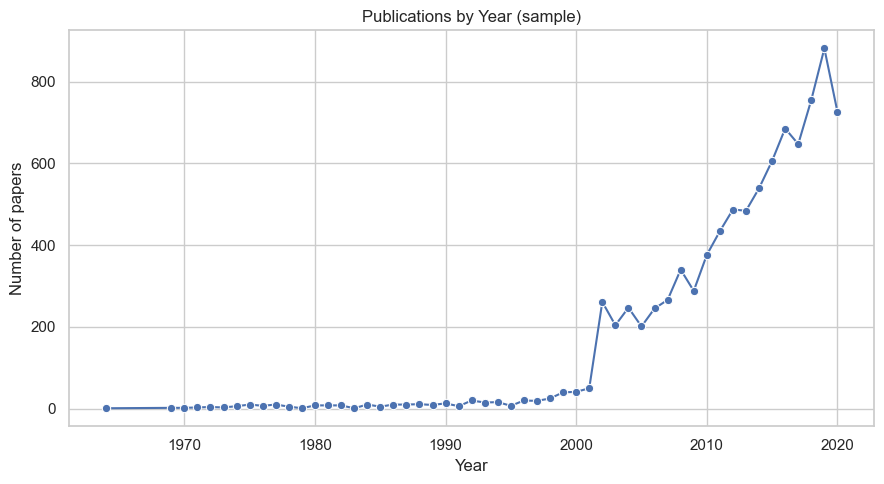

In [21]:
papers_by_year = df['year'].dropna().astype(int).value_counts().sort_index()
papers_by_year

plt.figure(figsize=(9,5))
sns.lineplot(x=papers_by_year.index, y=papers_by_year.values, marker='o')
plt.title("Publications by Year (sample)")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.tight_layout()
plt.show()


C:\Users\Emily\AppData\Local\Temp\ipykernel_32076\1863192878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette="magma")


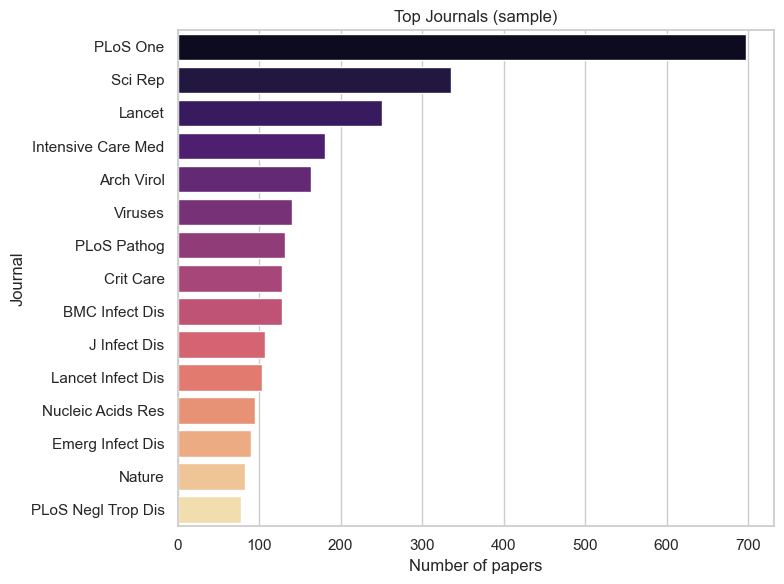

In [22]:
top_journals = df['journal'].fillna("Unknown").value_counts().head(15)
top_journals

plt.figure(figsize=(8,6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="magma")
plt.title("Top Journals (sample)")
plt.xlabel("Number of papers")
plt.ylabel("Journal")
plt.tight_layout()
plt.show()


In [23]:
# simple tokenizer and stopword removal (no heavy NLP required)
stopwords = set([
    "the","and","of","in","to","a","for","on","with","is","are","by","from","using","an","as",
    "covid","covid-19","sars-cov-2","coronavirus"
])
text = " ".join(df['title'].dropna().astype(str).str.lower().tolist())
words = re.findall(r'\b[a-z]{3,}\b', text)   # words of length >=3
words = [w for w in words if w not in stopwords]

freq = Counter(words)
most_common = freq.most_common(30)
most_common[:15]


[('virus', 1495),
 ('influenza', 860),
 ('infection', 721),
 ('respiratory', 583),
 ('human', 558),
 ('disease', 478),
 ('patients', 460),
 ('cell', 453),
 ('viral', 436),
 ('cells', 405),
 ('acute', 398),
 ('protein', 394),
 ('analysis', 372),
 ('health', 366),
 ('study', 353)]

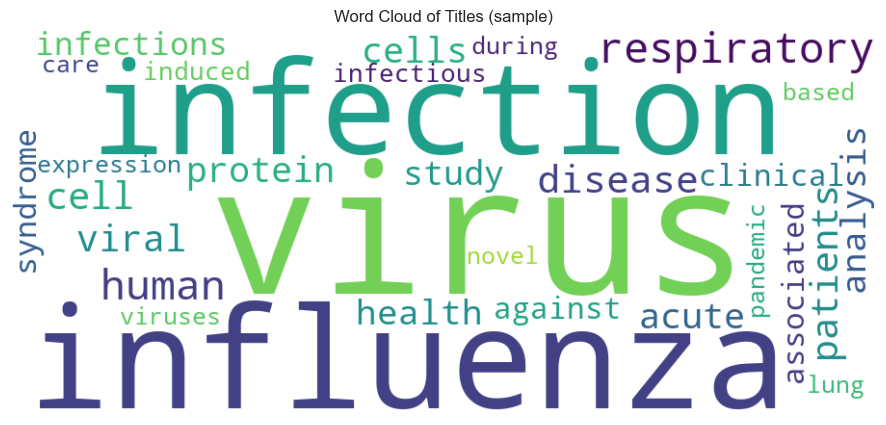

In [24]:
# create frequency dict
freq_dict = dict(most_common)

# generate & show
wordcloud = WordCloud(width=900, height=400, background_color='white').generate_from_frequencies(freq_dict)
plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Titles (sample)")
plt.show()


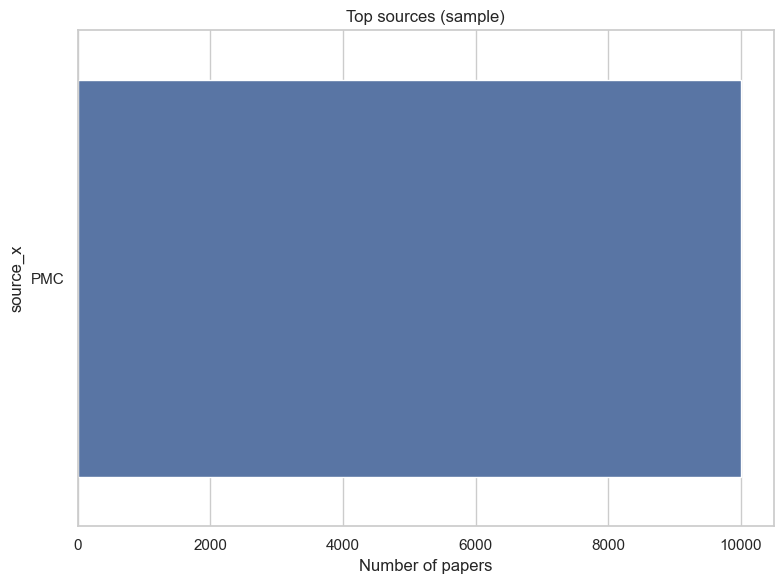

In [25]:
# source_x often holds driving source (e.g., 'bioRxiv', 'PMC', 'medRxiv'); check your column name
src = df.get('source_x', df.get('source', 'Unknown')).fillna('Unknown')
src_counts = src.value_counts().head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=src_counts.values, y=src_counts.index)
plt.title("Top sources (sample)")
plt.xlabel("Number of papers")
plt.tight_layout()
plt.show()


In [28]:
!.\venv\Scripts\activate
